In [9]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the CSV file

responsesdf = pd.read_csv("Responses.csv",header=None)
answersdf=pd.read_csv('Answers.csv',header=None)


# Calculate the number of 3-column DataFrames
num_sub_dfs = responsesdf.shape[1] // 3

# Dictionary to hold the smaller DataFrames
responses_dfs = {}
answers_dfs={}

# Loop through and create each smaller DataFrame
for i in range(num_sub_dfs):
    start_col = i * 3
    end_col = start_col + 3
    response_df_name = f"response_{i+1}"  # Naming each smaller DataFrame
    answer_df_name=f"answer_{i+1}"
    responses_dfs[response_df_name] = responsesdf.iloc[:, start_col:end_col]
    answers_dfs[answer_df_name] = answersdf.iloc[:,start_col:end_col]




# Now 'sub_dfs' dictionary contains each smaller DataFrame
# You can access them like sub_dfs['sub_df_1'], sub_dfs['sub_df_2'], etc.

# Example to print the first small DataFrame
# print(responses_dfs['response_1'])

print(answers_dfs['answer_1'])

               0      1                                                  2
0  Very Negative  State                 Pirate Position, Treasure Position
1  Very Negative  State  Pirate Position, Pirate Orientation, Treasure ...
2            NaN    NaN                                                NaN
3            NaN    NaN                                                NaN
4            NaN    NaN                                                NaN


Perfect Trajectories

In [18]:
import pandas as pd  # Make sure pandas is imported

matching_counts = {}

# Loop through each response sub-DataFrame
for i,(name, response_df) in enumerate(responses_dfs.items()):
    # Initialize the count for this sub-DataFrame
    matching_count = 0
    
    # Get the corresponding answer DataFrame
    answer_df = answers_dfs[f"answer_{i+1}"]

    # Iterate through the rows of the response DataFrame (assuming first 12 rows are respondent answers)
    for i in range(12):  # Adjust this if the number of respondents changes
        response_row = response_df.iloc[i]
        row_matched = False

        # Iterate through each row in the answer DataFrame, which contains possible correct answers
        for j in range(len(answer_df)):
            correct_answers = answer_df.iloc[j]
            match = True

            # Check each cell in the row for a match
            for col_index, (response_val, correct_ans) in enumerate(zip(response_row, correct_answers)):
                # Check if we are in the third column and handle NaN values
                if col_index == 2:  # Assuming third column is indexed as 2
                    if pd.isna(correct_ans) or pd.isna(response_val):
                        # If correct_ans is NaN, any response_val is considered a match, same if response_val is NaN
                        continue
                else:
                    # For the first two columns, treat NaN in response as no match
                    if pd.isna(correct_ans):
                        match = False
                        break

                # For non-NaN values, check if they match
                if not pd.isna(correct_ans) and response_val != correct_ans:
                    match = False
                    break

            # If the row matches any one of the correct answer rows, mark it as matched
            if match:
                row_matched = True
                break  # Break out of the loop through answer_df rows as we found a match

        # If the row matched any of the correct answer rows, increment the count
        if row_matched:
            matching_count += 1

    # Store the count of matching rows for this sub-DataFrame
    matching_counts[name] = matching_count

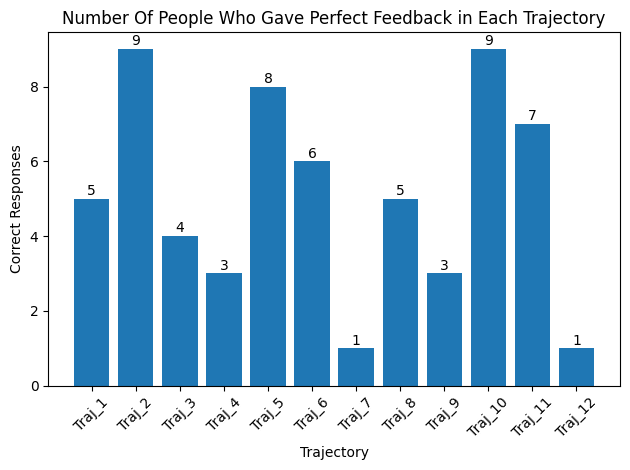

In [19]:
labels = [f"Traj_{i+1}" for i in range(len(matching_counts))]

# Bar chart
plt.bar(labels, matching_counts.values())

plt.xlabel('Trajectory')
plt.ylabel('Correct Responses')
plt.title('Number Of People Who Gave Perfect Feedback in Each Trajectory')

# Adding the count on each bar
for i, value in enumerate(matching_counts.values()):
    plt.text(i, value + 0.1, str(value), ha='center')

plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

plt.tight_layout()
plt.show()

Perfect Signals

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

matching_counts = {}

# Loop through each response sub-DataFrame
for i, (name, response_df) in enumerate(responses_dfs.items()):
    # Initialize the count for this sub-DataFrame
    matching_count = 0
    
    # Get the corresponding answer DataFrame
    answer_df = answers_dfs[f"answer_{i+1}"]

    # Assuming first 12 rows are respondent answers
    for idx in range(12):
        # Get the respondent's answer for the first column
        response_val = response_df.iloc[idx, 0]
        
        # Assuming correct answers are in the first row of the answer DataFrame
        correct_answers = answer_df.iloc[:, 0]

        # Check if the response matches any of the correct answers for the first column
        if response_val in correct_answers.values and not pd.isna(response_val):
            matching_count += 1

    # Store the count of matching rows for this sub-DataFrame
    matching_counts[name] = matching_count

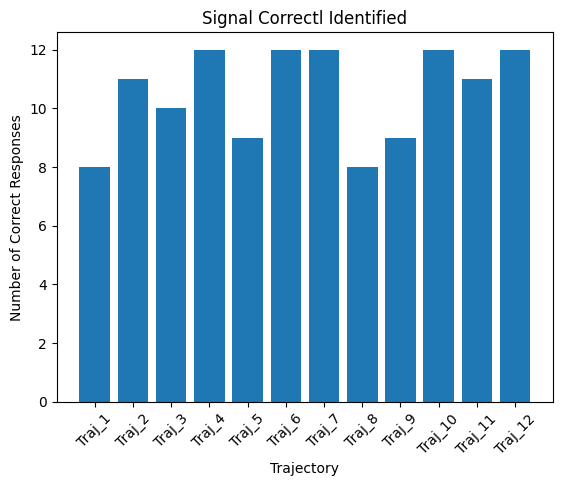

In [16]:
labels = [f"Traj_{i+1}" for i in range(len(matching_counts))]
plt.bar(labels, matching_counts.values())
plt.xlabel('Trajectory')
plt.ylabel('Number of Correct Responses')
plt.title('Signal Correctly Identified')
plt.xticks(rotation=45)
plt.show()